In [1]:
from tensorflow.keras import datasets

In [2]:
import keras.utils
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [5]:
import numpy as np
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 1) (10000, 1)


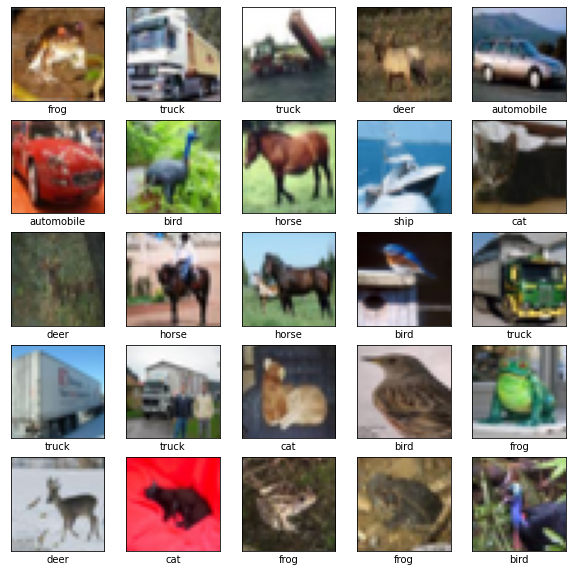

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [53]:
import numpy as np
gen = ImageDataGenerator(rotation_range=20,
                         shear_range=0.2,
                         width_shift_range=0.2,
                         height_shift_range=0.2,
                         horizontal_flip=True)

augment_ratio = 1.5
augment_size = int(augment_ratio * x_train.shape[0])

randidx = np.random.randint(x_train.shape[0],size=augment_size)

x_augmented = x_train[randidx].copy()
y_augmented = y_train[randidx].copy()

x_augmented,y_augmented = gen.flow(x_augmented,y_augmented,
                                    batch_size=augment_size,
                                    shuffle=False).next()

x_train = np.concatenate((x_train, x_augmented))
y_train = np.concatenate((y_train, y_augmented))

s = np.arange(x_train.shape[0])
np.random.shuffle(s)

x_train = x_train[s]
y_train = y_train[s]

In [55]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu',padding='same', input_shape=(32,32,3)))
model.add(Conv2D(32, (3,3), activation = 'relu',padding='same', input_shape=(32,32,3)))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3,3), activation = 'relu',padding='same' ))
model.add(Conv2D(64, (3,3), activation = 'relu',padding='same' ))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))
model.add(Conv2D(128, 3, activation = 'relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))
model.add(Conv2D(128, 3, activation = 'relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))
model.add(Conv2D(256, 3, activation = 'relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 8, 8, 64)         

In [57]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
              
model.fit(x_train, y_train, batch_size=256, epochs=250, validation_data=(x_test, y_test))

Epoch 1/250
489/489 [==============================] - 291s 594ms/step - loss: 1.1011 - accuracy: 0.6143 - val_loss: 0.9203 - val_accuracy: 0.6720
Epoch 2/250
489/489 [==============================] - 303s 620ms/step - loss: 1.0142 - accuracy: 0.6485 - val_loss: 0.8180 - val_accuracy: 0.7106
Epoch 3/250
489/489 [==============================] - 308s 629ms/step - loss: 0.9607 - accuracy: 0.6677 - val_loss: 0.7938 - val_accuracy: 0.7161
Epoch 4/250
489/489 [==============================] - 292s 596ms/step - loss: 0.9041 - accuracy: 0.6897 - val_loss: 0.6998 - val_accuracy: 0.7521
Epoch 5/250
489/489 [==============================] - 294s 601ms/step - loss: 0.8640 - accuracy: 0.7045 - val_loss: 0.6980 - val_accuracy: 0.7531
Epoch 6/250
489/489 [==============================] - 309s 633ms/step - loss: 0.8357 - accuracy: 0.7130 - val_loss: 0.6424 - val_accuracy: 0.7754
Epoch 7/250
489/489 [==============================] - 313s 640ms/step - loss: 0.8069 - accuracy: 0.7252 - val_loss: 0

KeyboardInterrupt: 

In [ ]:
import matplotlib,pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train, validation'], loc='best')
plt.grid()
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss trend')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train, validation'], loc='best')
plt.grid()
plt.show()